# CE-40719: Deep Learning
## HW5 - GAN (100 points)

#### Name: Sayed Hesam Alavian


### 1) Import Libraries

In [15]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms



### 2) Loading Dataset (10 points)

In this notebook, you will use `MNIST` dataset to train your GAN. You can see more information about this dataset [here](http://yann.lecun.com/exdb/mnist/). This dataset is a 10 class dataset. It contains 60000 grayscale images (50000 for train and 10000 for test or validation) each with shape (3, 28, 28). Every image has a corresponding label which is a number in range 0 to 9.

In [2]:
# MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

################ Problem 01 (5 pts) ################
# define hyper parameters
batch_size = 64
d_lr = 2e-4
g_lr = 2e-4
n_epochs = 100
####################### End ########################
z_dim = 100

In [4]:

################ Problem 02 (5 pts) ################
# Define Dataloaders
train_tensors = train_dataset.data.float() / 255
test_tensors = test_dataset.data.float() / 255

train_dataset = torch.utils.data.TensorDataset(train_tensors, train_dataset.targets)
test_dataset = torch.utils.data.TensorDataset(test_tensors, test_dataset.targets)


# train_loader = None
# test_loader = None
####################### End ########################
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### 3) Defining Network (30 points)
At this stage, you should define a network that improves your GAN training and prevents problems such as mode collapse and vanishing gradients.

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.discriminator = nn.Sequential(
            ################ Problem 03 (15 pts) ################
            # use linear or convolutional layer
            # use arbitrary techniques to stabilize training
                nn.Dropout(),
                nn.Linear(784, 256),
                nn.LeakyReLU(0.2),
                nn.Linear(256, 128),
                nn.LeakyReLU(0.2),
                nn.Linear(128, 64),
                nn.Dropout(),
                nn.LeakyReLU(0.2),
                nn.Linear(64, 1),
                nn.Sigmoid()

            ####################### End ########################
        )

    def forward(self, x):
        return self.discriminator(x)


class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.generator = nn.Sequential(
            ################ Problem 04 (15 pts) ################
            # use linear or convolutional layer
            # use arbitrary techniques to stabilize training
                nn.Linear(128, 128),
                nn.LeakyReLU(0.2),
                nn.Linear(128, 256),
                nn.LeakyReLU(0.2),
                nn.Linear(256, 512),
                nn.LeakyReLU(0.2),
                nn.Linear(512, 784),
                nn.Sigmoid()

            ####################### End ########################
        )

    def forward(self, z):
        return self.generator(z)


### 4) Train the Network 
At this step, you are going to train your network.

In [6]:
################ Problem 05 (5 pts) ################
# Create instances of modules (discriminator and generator)
# don't forget to put your models on device
discriminator = Discriminator()
generator = Generator()
CUDA = True
if CUDA:
  discriminator.cuda()
  generator.cuda()
####################### End ########################

In [7]:
################ Problem 06 (5 pts) ################
# Define two optimizer for discriminator and generator
d_optimizer = optim.Adam(discriminator.parameters(), lr=d_lr)
g_optimizer = optim.Adam(generator.parameters(), lr=g_lr)
####################### End ########################

epoch: 1 	 discriminator last batch loss: 0.0 	 generator last batch loss: 98.39850616455078


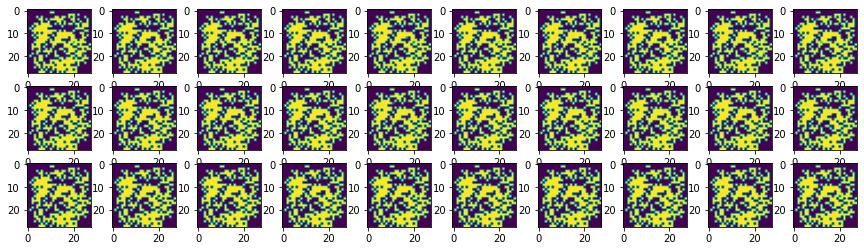

epoch: 6 	 discriminator last batch loss: 0.0 	 generator last batch loss: 96.13471984863281


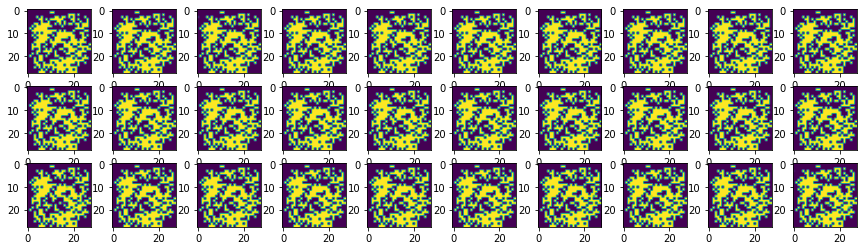

epoch: 11 	 discriminator last batch loss: 0.0 	 generator last batch loss: 92.38139343261719


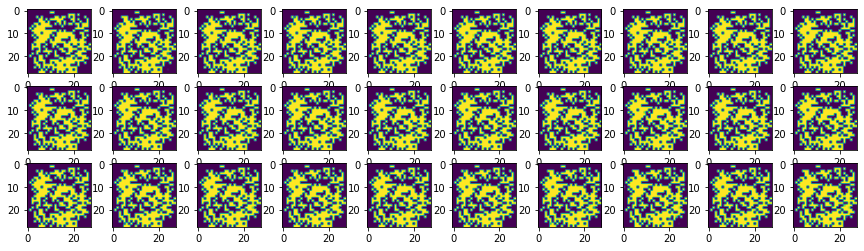

epoch: 16 	 discriminator last batch loss: 0.0004364678170531988 	 generator last batch loss: 18.46858024597168


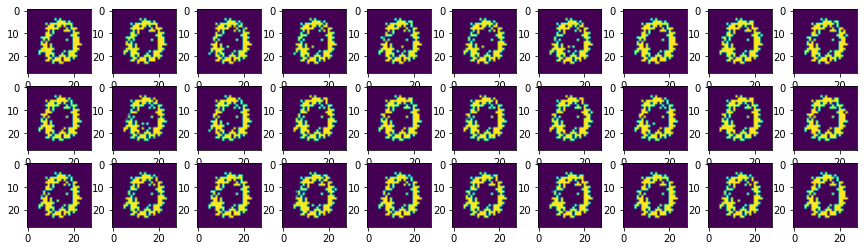

epoch: 21 	 discriminator last batch loss: 0.0 	 generator last batch loss: 27.432334899902344


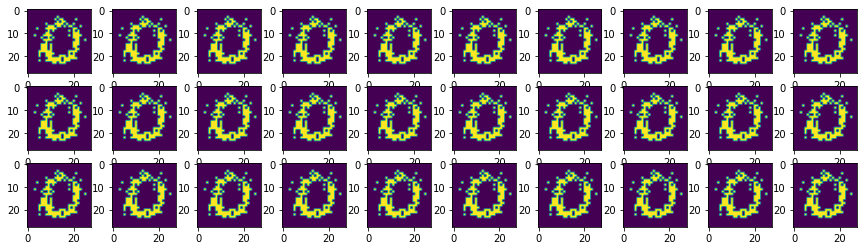

epoch: 26 	 discriminator last batch loss: 0.0019087567925453186 	 generator last batch loss: 12.634663581848145


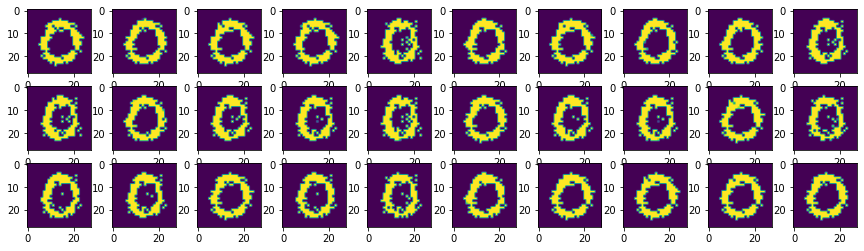

epoch: 31 	 discriminator last batch loss: 0.052089475095272064 	 generator last batch loss: 7.239338397979736


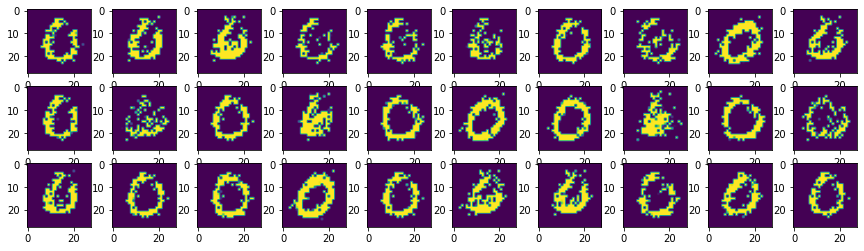

epoch: 36 	 discriminator last batch loss: 0.11074124276638031 	 generator last batch loss: 6.328312873840332


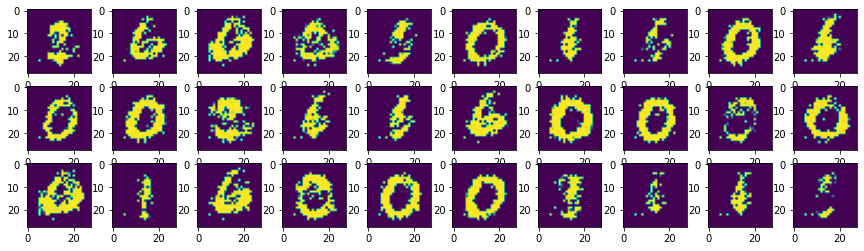

epoch: 41 	 discriminator last batch loss: 0.2071029543876648 	 generator last batch loss: 5.843502998352051


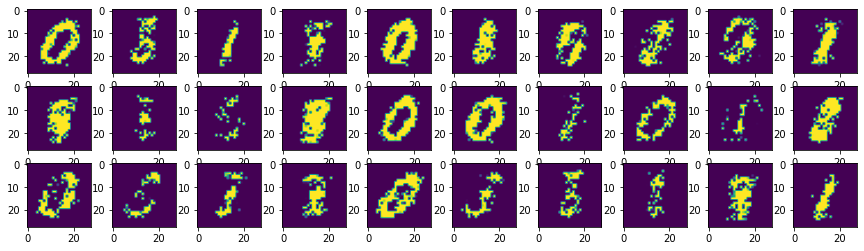

epoch: 46 	 discriminator last batch loss: 0.14069399237632751 	 generator last batch loss: 4.030627250671387


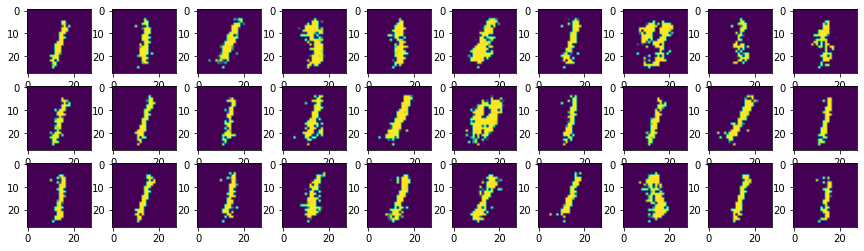

epoch: 51 	 discriminator last batch loss: 0.6086572408676147 	 generator last batch loss: 3.7104780673980713


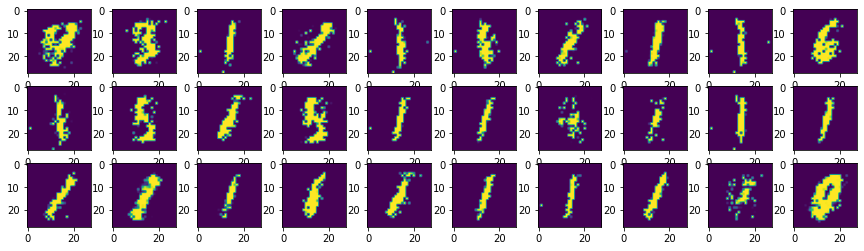

epoch: 56 	 discriminator last batch loss: 0.6006499528884888 	 generator last batch loss: 2.0230343341827393


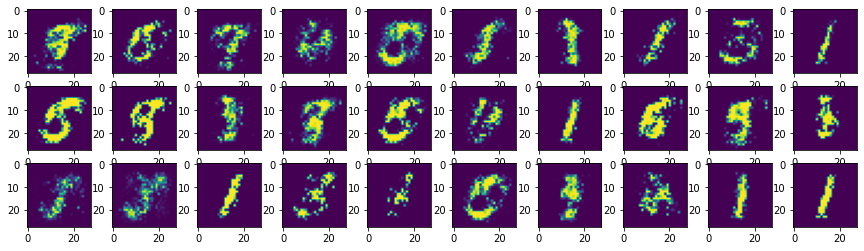

epoch: 61 	 discriminator last batch loss: 0.9538722038269043 	 generator last batch loss: 1.2866631746292114


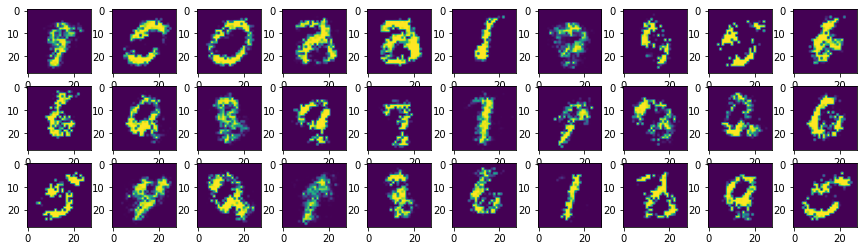

epoch: 66 	 discriminator last batch loss: 1.0998815298080444 	 generator last batch loss: 1.3505709171295166


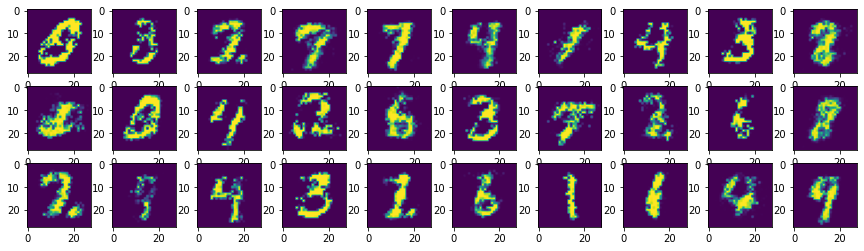

epoch: 71 	 discriminator last batch loss: 1.0626121759414673 	 generator last batch loss: 1.1556837558746338


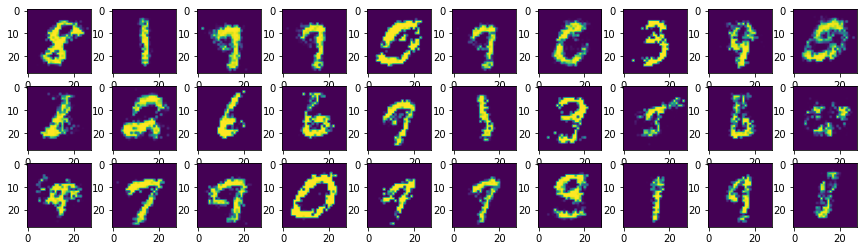

epoch: 76 	 discriminator last batch loss: 0.8227823972702026 	 generator last batch loss: 1.2086975574493408


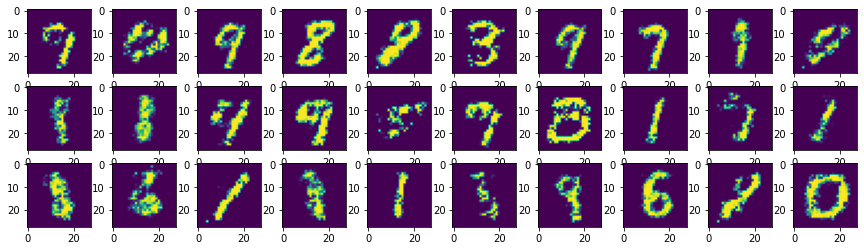

epoch: 81 	 discriminator last batch loss: 1.133533239364624 	 generator last batch loss: 1.2316404581069946


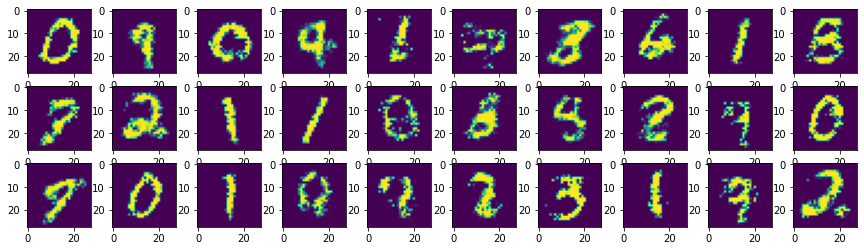

epoch: 86 	 discriminator last batch loss: 1.1869961023330688 	 generator last batch loss: 0.9344475269317627


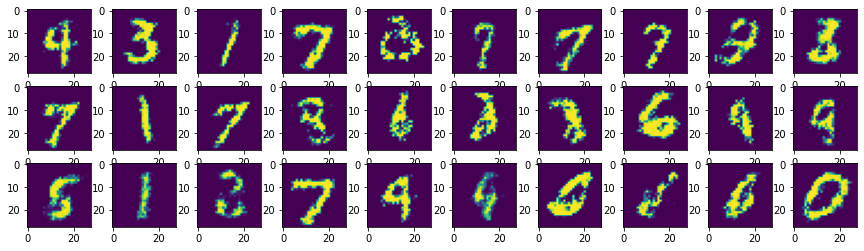

epoch: 91 	 discriminator last batch loss: 1.1341063976287842 	 generator last batch loss: 1.1636922359466553


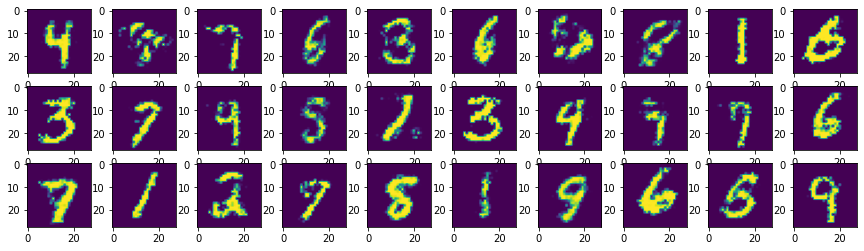

epoch: 96 	 discriminator last batch loss: 1.005568504333496 	 generator last batch loss: 1.1208572387695312


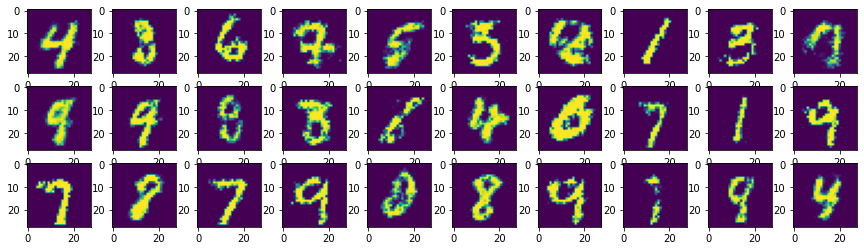

In [17]:
plot_frequency = 5
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 4) # set default size of plots
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        ################ Problem 07 (15 pts) ################
        # put your inputs on device
        # Prepare what you need for training, like inputs for modules and variables for computing loss
        images = images.flatten(start_dim=1)

        real_img = images
        if CUDA:
            real_img = real_img.cuda()

        fake_labels = torch.zeros(images.shape[0], 1).cuda()
        real_labels = torch.ones(images.shape[0], 1).cuda()
        z = torch.randn(images.shape[0], 128)
        if CUDA:
            z = z.cuda()
        fake_img = generator(z)

        d_optimizer.zero_grad()
        ####################### End ########################



        ################ Problem 08 (10 pts) ################
        # calculate discriminator loss and update it
        z = torch.randn(images.shape[0], 128)
        if CUDA:
          z = z.cuda()
        fake_img = generator(z)

        g_optimizer.zero_grad()
        # [CHANGED] BCE is more stable


        d_loss = (F.binary_cross_entropy(discriminator(fake_img.detach()), fake_labels) +
                  F.binary_cross_entropy(discriminator(real_img), real_labels))
        d_loss.backward()
        d_optimizer.step()

        ####################### End ########################
        
        

        ################ Problem 09 (10 pts) ################
        # calculate generator loss and update it

        g_loss = F.binary_cross_entropy(discriminator(fake_img), real_labels)
        g_loss.backward()
        g_optimizer.step()

        ####################### End ########################


    ################ Problem 10 (10 pts) ################
    # plot some of the generated pictures based on plot frequency variable

    if (epoch % plot_frequency == 0):
        

    ####################### End ########################
    
        print("epoch: {} \t discriminator last batch loss: {} \t generator last batch loss: {}".format(epoch + 1, d_loss.item(), g_loss.item()))
        for i in range(3):
            for j in range(10):
                plt.subplot(3, 10, i * 10 + j + 1)
                plt.imshow(fake_img[i * 10 + j].detach().cpu().view(28, 28).numpy())
        plt.show()                                                                                         
                                                                                           
   

epoch: 100 	 discriminator last batch loss: 1.2940068244934082 	 generator last batch loss: 0.855658769607544


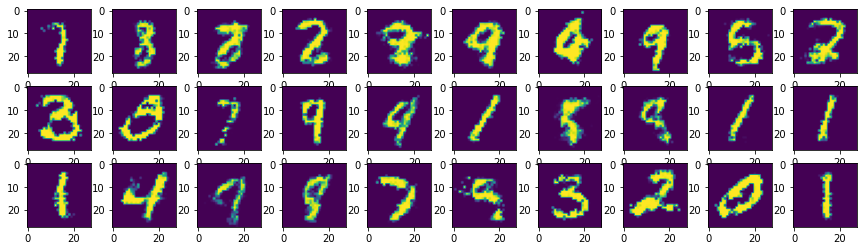

### 5) Save Generator
Save your final generator parameters. Upload it with your other files.

In [18]:
################ Problem 11 (5 pts) ################
# save state dict of your generator
path = "/content/Model/parameters"
torch.save(generator.state_dict(), path)
####################### End ########################

NameError: ignored